# Labor market analysis

This analysis want to underline how the pandemic period change the world of work in Lombardia region.

We used two different dataSet taken from Lombardia official  web_Site:
- **Rapporti_di_lavoro_attivati.csv**.
- **Rapporti_di_lavoro_cessati.csv**

The analysis is divided into three part:
1. The first is focus on the "Rapporti_di_lavoro_attivati" dataSet that include a general view of the dataSet, the elimination of the ambigues values (e.g. NAN data, ...) and a comparison between the periods before and during Covid19.


2. The second is focus on the "Rapporti_di_lavoro_cessati" dataSet that include a general view of the dataSet, the elimination of the ambigues values (e.g. NAN data, ...) and a comparison between the periods before and during Covid19.


3. The third is focus on the comparison of the first and the second analysis.

___

__Import modules__

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

plt.style.use('seaborn-whitegrid')

___

### __FIRST PART__

#### Load dataSet

In this session we are going to import the dataset with Pandas and we will see the main aspects of the dataset.

#### Description of table Columns:
- __Data__: the first time since the job contract started [day/month/year]
- __Genere__:sex of the worker [M: Male, F: Female]
- __Eta__: age of the worker [years]
- __Settore Economico Dettaglio__: business sector of the worker
- __Titolo Studio__: qualification of the worker
- __Contratto__: type of worker's contract
- __Provincia Impresa__: company headquarters
- __Italiano__: worker's nationality

In [2]:
## We will display DF head and tail
df_Rapporti_Attivati = pd.read_csv('Rapporti_di_lavoro_attivati.csv')
df_Rapporti_Attivati

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
9579789,01/03/2020,M,52,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
9579790,06/09/2010,M,61,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ALBANIA
9579791,06/11/2021,M,37,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,SENEGAL
9579792,02/02/2010,M,35,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,TEMPO PIENO,BERGAMO,SENEGAL


In [3]:
## We will see the number of rows and columns of the dataset
row = df_Rapporti_Attivati.shape[0]
column = df_Rapporti_Attivati.shape[1]
print(f'Rows: {row}')
print(f'Column: {column}')

Rows: 9579794
Column: 9


In [4]:
## We will see the values type of the columns
df_Rapporti_Attivati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579794 entries, 0 to 9579793
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 657.8+ MB


___

__General data view__

In this paragraph we will explore the dataset with a global analysis. It includes:
1. Description in a single column: We will display the different values (e.g. count, average age, values type...) associated with the 'ETA' column.
2. Histogram visualization of the different age groups distribution.
3. Distribution for gender.
4. Through a pie chart we will see the distribution of the different 'PROVINCIAIMPRESA'.
5. Finally, we will display the number of jobs by gender for each city.

1. __Description in a single column__

In [5]:
df_Rapporti_Attivati.ETA.describe().round(2)

count    9579794.00
mean          35.30
std           11.78
min            0.00
25%           25.00
50%           34.00
75%           44.00
max          221.00
Name: ETA, dtype: float64

2. __Dristribution of 'ETA'__

Text(0, 0.5, 'Density')

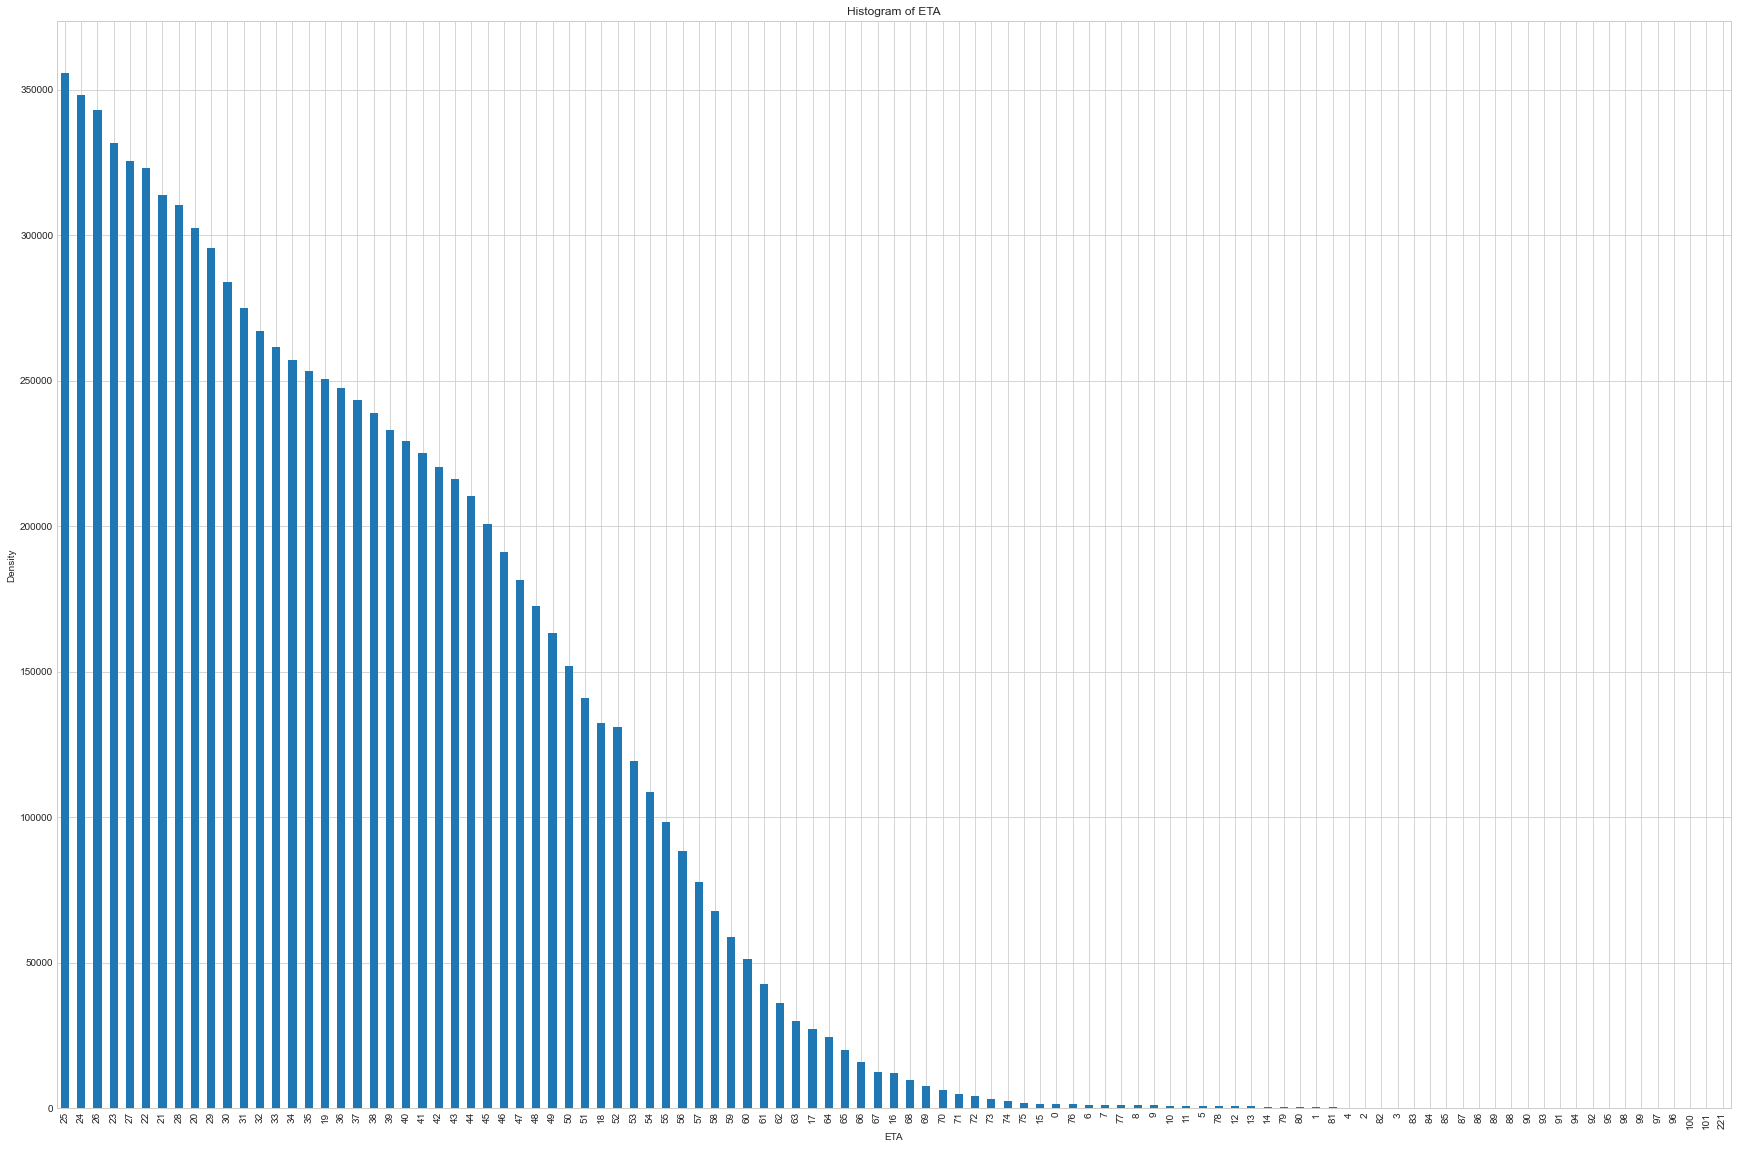

In [6]:
df_Rapporti_Attivati['ETA'].value_counts().plot(kind='bar', figsize=(30, 20))
plt.title('Histogram of ETA')
plt.xlabel('ETA')
plt.ylabel('Density')

3. __Distribution of 'GENERE'__

Text(0.5, 1.0, 'Distribution for GENERE')

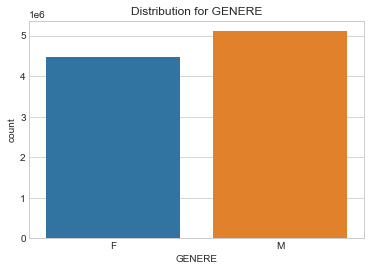

In [7]:
sns.countplot(x='GENERE', data=df_Rapporti_Attivati)
plt.title('Distribution for GENERE')

4. __Pie chart 'PROVINCIAIMPRESA'__

MILANO             4765803
BRESCIA            1167053
BERGAMO             806702
VARESE              548804
MONZA E BRIANZA     487469
COMO                381673
MANTOVA             357928
PAVIA               319569
CREMONA             241723
LECCO               203317
SONDRIO             161758
LODI                137995
Name: PROVINCIAIMPRESA, dtype: int64


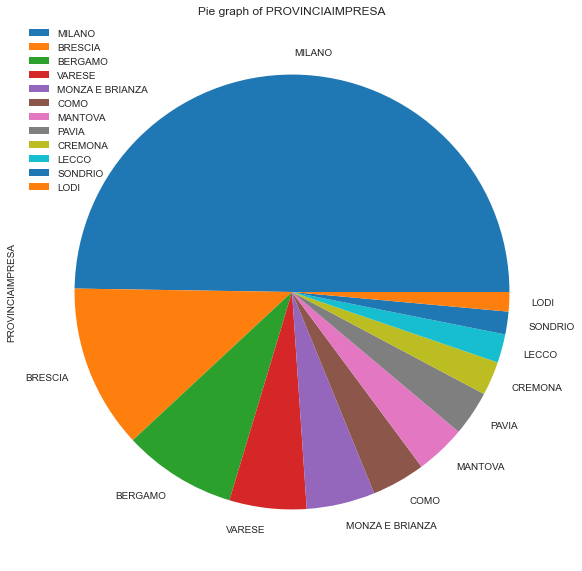

In [8]:
df_Rapporti_Attivati['PROVINCIAIMPRESA'].value_counts().plot(kind='pie', figsize=(10, 10))
plt.title('Pie graph of PROVINCIAIMPRESA')
plt.legend(loc=2)

print(df_Rapporti_Attivati['PROVINCIAIMPRESA'].value_counts())

5. __Distribution of Job for gender for each city__

Text(0.5, 1.0, 'Percentage of distribution in cities by gender')

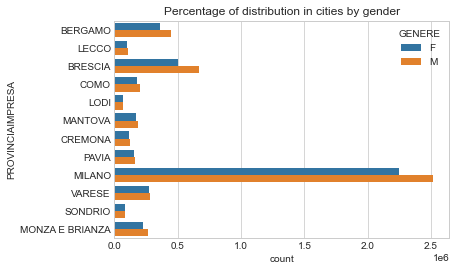

In [9]:
sns.countplot(y='PROVINCIAIMPRESA', hue='GENERE', data=df_Rapporti_Attivati)
plt.title('Percentage of distribution in cities by gender')

___

### __Data cleaning and preparing__

The initial analysis show an  ambiguities in the data (e.g. zero years old people, NAN values, ...).

In this session we will clean the dataSet through:

1. __Elimination of people with wrong age.__
2. __Elimination of all null values.__

1. __Elimination of people with wrong age.__

In this analysis we will take a range of age between 18 and 69

In [10]:
dropAge = df_Rapporti_Attivati[(df_Rapporti_Attivati['ETA'] >= 70) | (df_Rapporti_Attivati['ETA'] <= 17)].index

In [11]:
df_Rapporti_Attivati.drop(dropAge, inplace=True)

2. __Elimination of all null values.__

In [12]:
col = ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 
       'MODALITALAVORO', 'PROVINCIAIMPRESA','ITALIANO']

for column in col:
    df_Rapporti_Attivati.loc[df_Rapporti_Attivati[column] == '?', column] = np.nan

df_Rapporti_Attivati.dropna(axis = 0, inplace = True)

___

### __Data analysis before and during Covid19__

After the previous analysis of the dataset, we will fill out the distribution of:
1. __Global business contract.__
2. __Before-Covid business contract.__
3. __During-Covid business contract.__

NOTE: during the analysis of the business contract distribution, we will consider the same range of time

In [13]:
data=df_Rapporti_Attivati['DATA']

In [14]:
year=[]
month=[]
day=[]
data_Complete=[]
for i in data:
    data1=datetime.strptime(i, "%d/%m/%Y")
    year.append(data1.year)
    month.append(data1.month)
    day.append(data1.day)
    data_Complete.append(data1)

In [15]:
df_Rapporti_Attivati.drop(['DATA'], axis=1, inplace=True)

In [16]:
df_Rapporti_Attivati['DATA'] = data_Complete
df_Rapporti_Attivati['YEAR'] = year
df_Rapporti_Attivati['MONTH'] = month
df_Rapporti_Attivati['DAY'] = day

In [17]:
df_Rapporti_Attivati

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MONTH,DAY
0,F,60.0,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020-05-09,2020,5,9
1,M,43.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019-07-12,2019,7,12
2,F,20.0,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2013-06-05,2013,6,5
3,F,28.0,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA,2010-03-12,2010,3,12
4,F,49.0,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA,2021-04-06,2021,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9579788,M,40.0,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ALGERIA,2019-08-07,2019,8,7
9579789,M,52.0,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2020-03-01,2020,3,1
9579790,M,61.0,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ALBANIA,2010-09-06,2010,9,6
9579791,M,37.0,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,SENEGAL,2021-11-06,2021,11,6


___

1. __Global Data Analysis__

In [18]:
global_Data_YEAR = df_Rapporti_Attivati.groupby(['YEAR']).MONTH.count()

In [19]:
global_Data_MONTH = df_Rapporti_Attivati.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

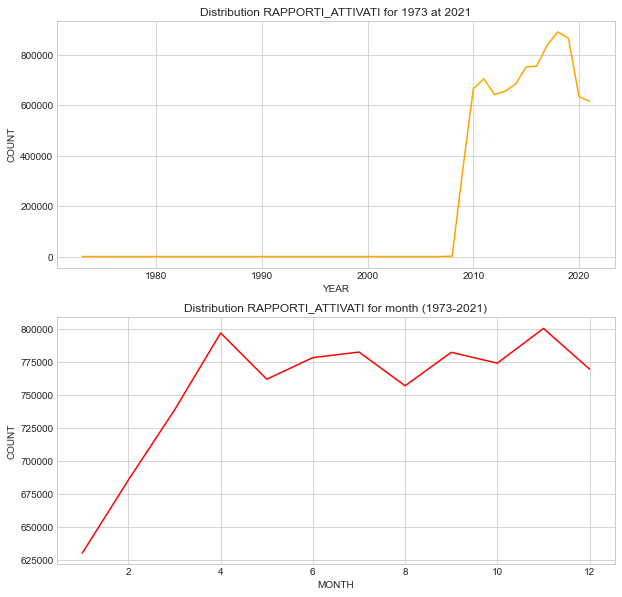

In [20]:
## crete a different subplot for two dataAnalysis
figure = plt.figure(figsize=(10, 10))

x_dataY = global_Data_YEAR.index
y_dataY = global_Data_YEAR.values

x_dataM = global_Data_MONTH.index
y_dataM = global_Data_MONTH.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY, y_dataY, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI for 1973 at 2021')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM, y_dataM, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for month (1973-2021)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [21]:
data_global_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['GENERE'] == 'M')]
data_global_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['GENERE'] == 'F')]

In [22]:
global_Data_YEAR_M = data_global_M.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_F = data_global_F.groupby(['MONTH']).GENERE.count()

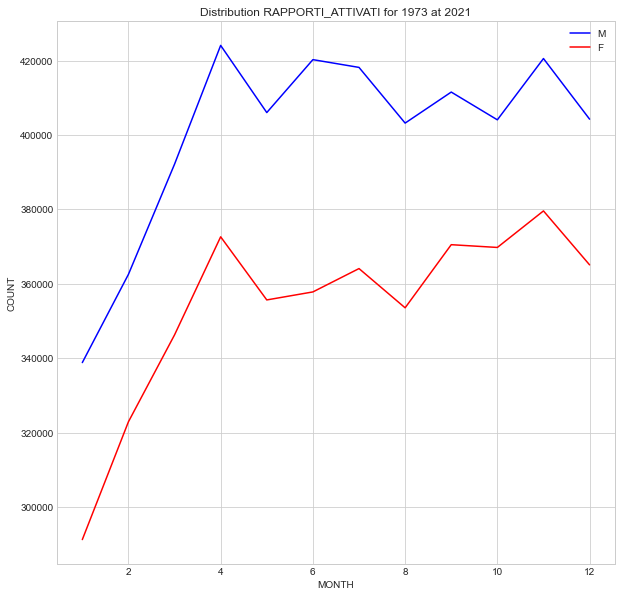

In [23]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_M = global_Data_YEAR_M.index
y_dataY_M = global_Data_YEAR_M.values

x_dataY_F = global_Data_YEAR_F.index
y_dataY_F = global_Data_YEAR_F.values


ax.plot(x_dataY_M, y_dataY_M, color='blue', label='M')
ax.plot(x_dataY_F, y_dataY_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI for 1973 at 2021')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

2. __Data Analysis Before covid__

In [24]:
data_Before_Covid = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019)]

In [25]:
global_Data_YEAR_Before_Covid = data_Before_Covid.groupby(['YEAR']).MONTH.count()

In [26]:
global_Data_MONTH_Before_Covid = data_Before_Covid.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

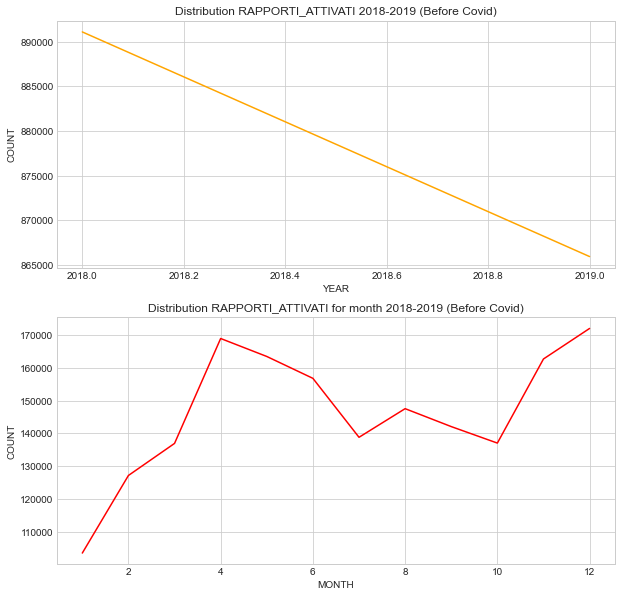

In [27]:
figure = plt.figure(figsize=(10, 10))

x_dataY_BC = global_Data_YEAR_Before_Covid.index
y_dataY_BC = global_Data_YEAR_Before_Covid.values

x_dataM_BC = global_Data_MONTH_Before_Covid.index
y_dataM_BC = global_Data_MONTH_Before_Covid.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_BC, y_dataY_BC, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI 2018-2019 (Before Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_BC, y_dataM_BC, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for month 2018-2019 (Before Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [28]:
data_Before_Covid_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019) & (df_Rapporti_Attivati['GENERE'] == 'M')]

data_Before_Covid_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019) & (df_Rapporti_Attivati['GENERE'] == 'F')]

In [29]:
global_Data_YEAR_before_Covid_M = data_Before_Covid_M.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_before_Covid_F = data_Before_Covid_F.groupby(['MONTH']).GENERE.count()

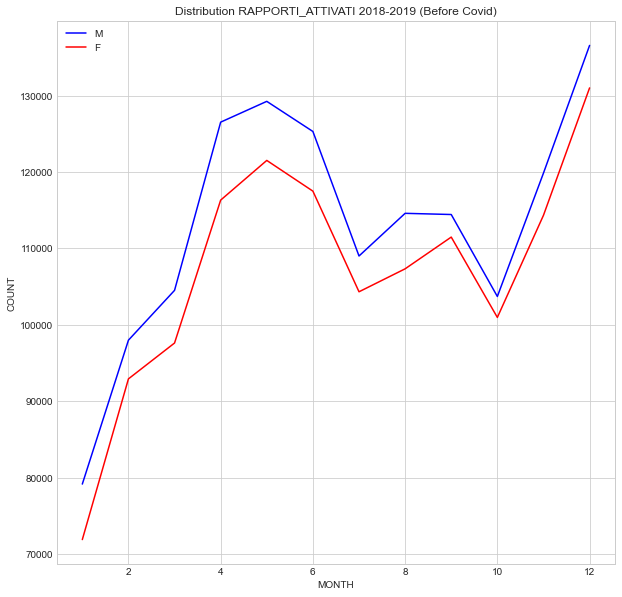

In [30]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_BC_M = global_Data_YEAR_before_Covid_M.index
y_dataY_BC_M = global_Data_YEAR_before_Covid_M.values

x_dataY_BC_F = global_Data_YEAR_before_Covid_F.index
y_dataY_BC_F = global_Data_YEAR_before_Covid_F.values


ax.plot(x_dataY_BC_M, y_dataY_BC_M, color='blue', label='M')
ax.plot(x_dataY_BC_F, y_dataY_BC_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI 2018-2019 (Before Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

3. __Data Analysis during covid__

In [31]:
data_during_Covid = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019)]

In [32]:
global_Data_YEAR_during_Covid = data_during_Covid.groupby(['YEAR']).MONTH.count()

In [33]:
global_Data_MONTH_during_Covid = data_during_Covid.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

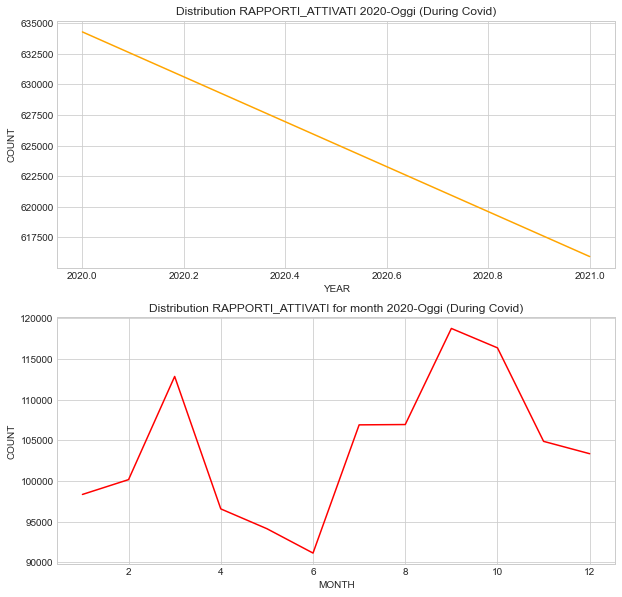

In [34]:
figure = plt.figure(figsize=(10, 10))

x_dataY_DC = global_Data_YEAR_during_Covid.index
y_dataY_DC = global_Data_YEAR_during_Covid.values

x_dataM_DC = global_Data_MONTH_during_Covid.index
y_dataM_DC = global_Data_MONTH_during_Covid.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_DC, y_dataY_DC, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI 2020-Oggi (During Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_DC, y_dataM_DC, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for month 2020-Oggi (During Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [35]:
data_during_Covid_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019) & (df_Rapporti_Attivati['GENERE'] == 'M')]
data_during_Covid_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019) & (df_Rapporti_Attivati['GENERE'] == 'F')]

In [36]:
global_Data_YEAR_during_Covid_M = data_during_Covid_M.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_during_Covid_F = data_during_Covid_F.groupby(['MONTH']).GENERE.count()

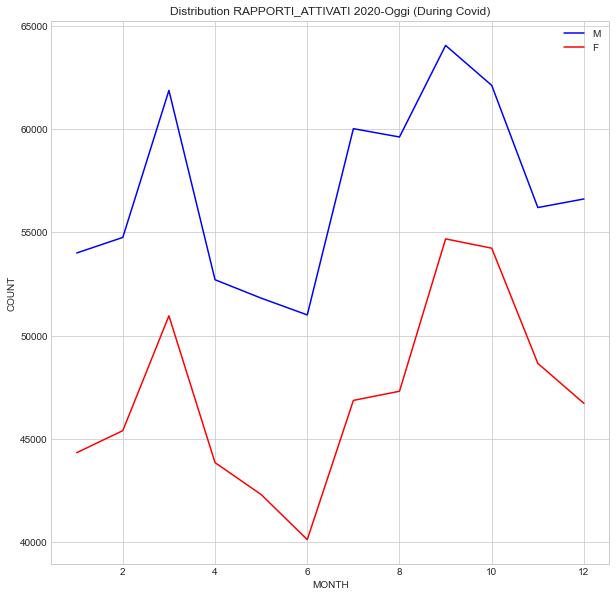

In [37]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_DC_M = global_Data_YEAR_during_Covid_M.index
y_dataY_DC_M = global_Data_YEAR_during_Covid_M.values

x_dataY_DC_F = global_Data_YEAR_during_Covid_F.index
y_dataY_DC_F = global_Data_YEAR_during_Covid_F.values


ax.plot(x_dataY_DC_M, y_dataY_DC_M, color='blue', label='M')
ax.plot(x_dataY_DC_F, y_dataY_DC_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI 2020-Oggi (During Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()


___

### __SECOND PART__

#### Load dataSet

In this session we are going to import the dataset with Pandas and we will see the main aspects of the dataset.

Description of table Columns:
- **Data**: the first time since the job contract started [day/month/year]
- **Genere**:sex of the worker [M: Male, F: Female]
- **Eta**: age of the worker [years]
- **Settore Economico Dettaglio**: business sector of the worker
- **Titolo Studio**: qualification of the worker
- **Contratto**: type of worker's contract
- **Provincia Impresa**: company headquarters
- **Italiano**: worker's nationality

In [38]:
Rapporti_Lavoro_Cessati_DF = pd.read_csv('Rapporti_di_lavoro_cessati.csv')

In [39]:
Rapporti_Lavoro_Cessati_DF

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,02/04/2019,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,08/06/2018,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,02/02/2016,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/01/2015,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,09/08/2017,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
3741389,05/11/2018,M,19,Fabbricazione di altri elementi in legno e di ...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
3741390,09/04/2017,M,67,Altra istruzione secondaria di secondo grado d...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA
3741391,08/05/2015,M,59,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO
3741392,10/10/2016,M,26,Installazione di altre macchine ed apparecchia...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [40]:
## We will see the number of rows and columns of the dataset
row = Rapporti_Lavoro_Cessati_DF.shape[0]
column = Rapporti_Lavoro_Cessati_DF.shape[1]
print(f'Rows: {row}')
print(f'Column: {column}')

Rows: 3741394
Column: 9


In [41]:
## We will see the values type of the columns
Rapporti_Lavoro_Cessati_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741394 entries, 0 to 3741393
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 256.9+ MB


___

__General data view__

In this paragraph we will explore the dataset with a global analysis. It includes:

1. Description in a single column: We will display the different values (e.g. count, average age, values type...) associated with the 'ETA' column.
2. Histogram visualization of the different age groups distribution.
3. Distribution for gender.
4. Through a pie chart we will see the distribution of the different 'PROVINCIAIMPRESA'.
5. Finally, we will display the number of jobs by gender for each city.

1. __Description in a single column__

In [42]:
Rapporti_Lavoro_Cessati_DF['ETA'].describe().round(2)

count    3741394.00
mean          38.11
std           12.62
min            0.00
25%           28.00
50%           37.00
75%           47.00
max          621.00
Name: ETA, dtype: float64

2. __Dristribution of 'ETA'__

Text(0, 0.5, 'Density')

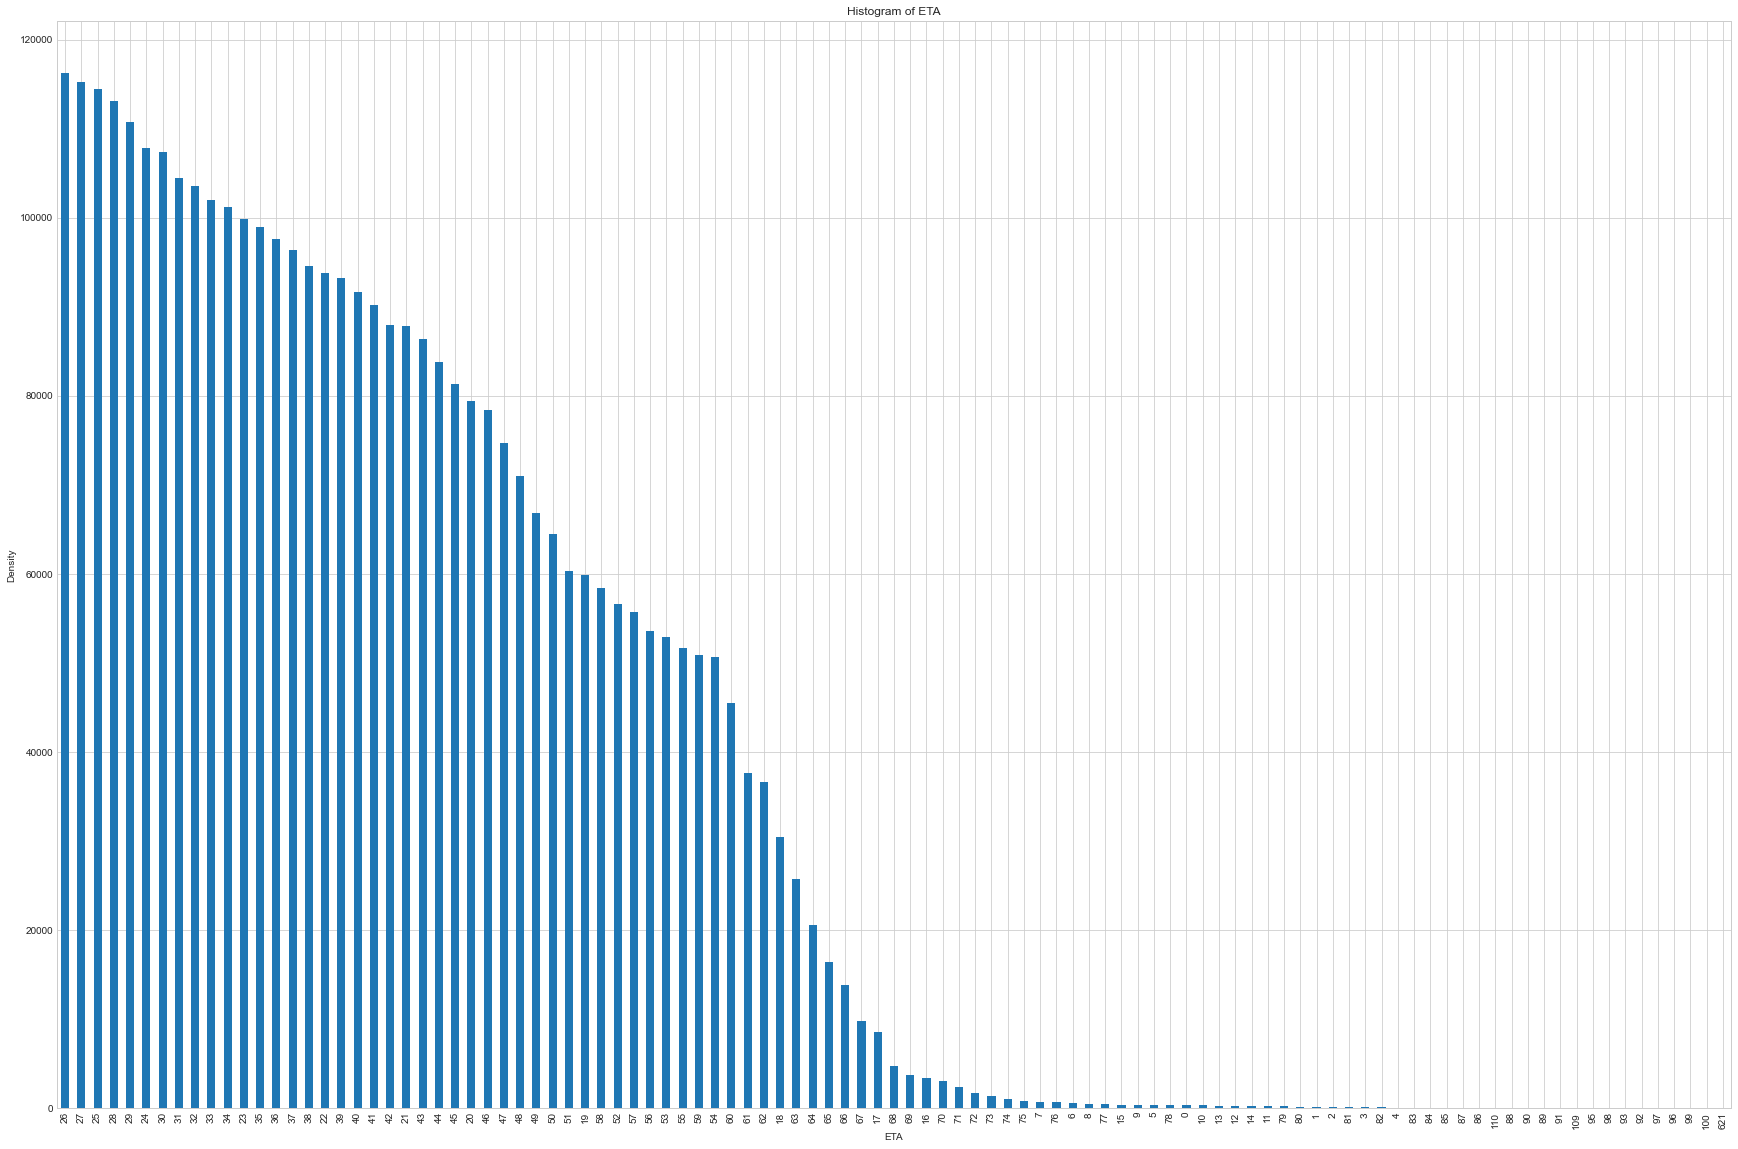

In [43]:
Rapporti_Lavoro_Cessati_DF['ETA'].value_counts().plot(kind='bar', figsize=(30, 20))
plt.title('Histogram of ETA')
plt.xlabel('ETA')
plt.ylabel('Density')

3. __Distribution of 'GENERE'__

Text(0.5, 1.0, 'Distribution for GENERE')

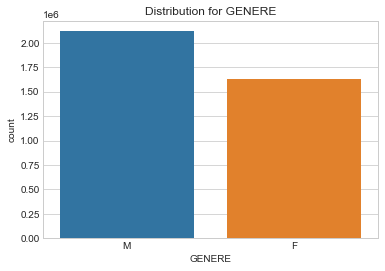

In [44]:
sns.countplot(x='GENERE', data=Rapporti_Lavoro_Cessati_DF)
plt.title('Distribution for GENERE')

4. __Pie chart 'PROVINCIAIMPRESA'__

MILANO             1658400
BRESCIA             454133
BERGAMO             356196
MONZA E BRIANZA     248667
VARESE              239937
COMO                182745
PAVIA               147646
MANTOVA             142542
CREMONA              95434
LECCO                87255
LODI                 66423
SONDRIO              62016
Name: PROVINCIAIMPRESA, dtype: int64


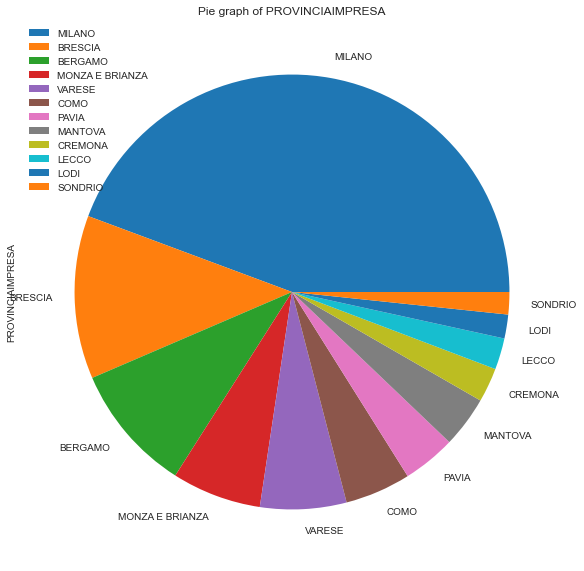

In [45]:
Rapporti_Lavoro_Cessati_DF['PROVINCIAIMPRESA'].value_counts().plot(kind='pie', figsize=(10, 10))
plt.title('Pie graph of PROVINCIAIMPRESA')
plt.legend(loc=2)

print(Rapporti_Lavoro_Cessati_DF['PROVINCIAIMPRESA'].value_counts())

5. __Distribution of Job for gender for each city__

Text(0.5, 1.0, 'Percentage of distribution in cities by gender')

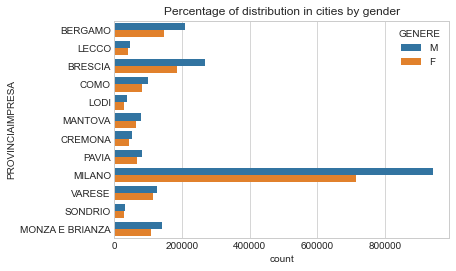

In [46]:
sns.countplot(y='PROVINCIAIMPRESA', hue='GENERE', data=Rapporti_Lavoro_Cessati_DF)
plt.title('Percentage of distribution in cities by gender')

___

### __Data cleaning and preparing__

The initial analysis show an ambiguities in the data (e.g. zero years old people, NAN values, ...).

In this session we will clean the dataSet through:

1. __Elimination of people with wrong age__.
2. __Elimination of all null values__.

1. __Elimination of people with wrong age__. 

In this analysis we will take a range of age between 18 and 69

In [47]:
dropAgeC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['ETA'] >= 70) | (Rapporti_Lavoro_Cessati_DF['ETA'] <= 17)].index

In [48]:
Rapporti_Lavoro_Cessati_DF.drop(dropAgeC, inplace=True)

2. __Elimination of all null values.__

In [49]:
colC = ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 
       'MODALITALAVORO', 'PROVINCIAIMPRESA','ITALIANO']

for column in colC:
    Rapporti_Lavoro_Cessati_DF.loc[Rapporti_Lavoro_Cessati_DF[column] == '?', column] = np.nan

Rapporti_Lavoro_Cessati_DF.dropna(axis = 0, inplace = True) 

___

### __Data analysis before and during Covid19__

After the previous analysis of the dataset, we will fill out the distribution of:

1. __Global Data Analysis__.
2. __Data Analysis Before covid__.
3. __Data Analysis During covid__.

NOTE: during the analysis of the business contract distribution, we will consider the same range of time

In [50]:
dataC=Rapporti_Lavoro_Cessati_DF['DATA']

In [51]:
yearC=[]
monthC=[]
dayC=[]
data_CompleteC=[]
for i in dataC:
    data1C=datetime.strptime(i, "%d/%m/%Y")
    yearC.append(data1C.year)
    monthC.append(data1C.month)
    dayC.append(data1C.day)
    data_CompleteC.append(data1C)

In [52]:
Rapporti_Lavoro_Cessati_DF.drop(['DATA'], axis=1, inplace=True)

In [53]:
Rapporti_Lavoro_Cessati_DF['DATA'] = data_CompleteC
Rapporti_Lavoro_Cessati_DF['YEAR'] = yearC
Rapporti_Lavoro_Cessati_DF['MONTH'] = monthC
Rapporti_Lavoro_Cessati_DF['DAY'] = dayC

In [54]:
Rapporti_Lavoro_Cessati_DF

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MONTH,DAY
0,M,20.0,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2019-04-02,2019,4,2
1,F,28.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2018-06-08,2018,6,8
2,F,20.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2016-02-02,2016,2,2
3,M,59.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2015-01-12,2015,1,12
4,M,61.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2017-08-09,2017,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...
3741389,M,19.0,Fabbricazione di altri elementi in legno e di ...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2018-11-05,2018,11,5
3741390,M,67.0,Altra istruzione secondaria di secondo grado d...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2017-04-09,2017,4,9
3741391,M,59.0,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO,2015-05-08,2015,5,8
3741392,M,26.0,Installazione di altre macchine ed apparecchia...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2016-10-10,2016,10,10


1. __Global Data Analysis__

In [55]:
global_Data_YEARC = Rapporti_Lavoro_Cessati_DF.groupby(['YEAR']).MONTH.count()

In [56]:
global_Data_MONTHC = Rapporti_Lavoro_Cessati_DF.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

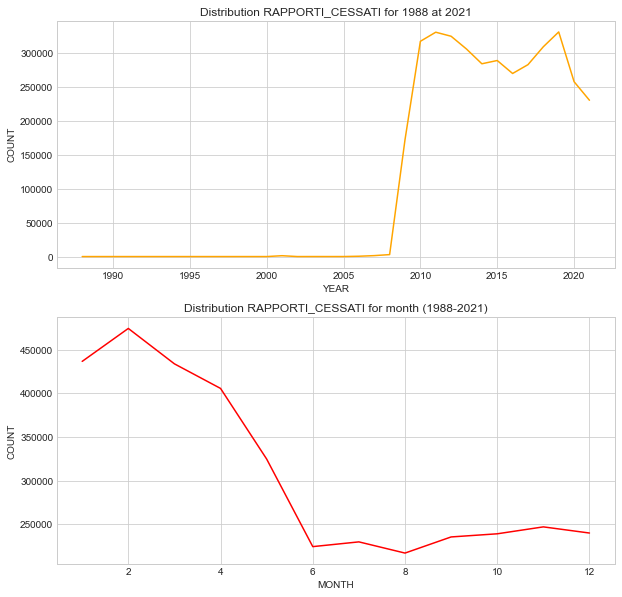

In [57]:
## crete a different subplot for two dataAnalysis
figure = plt.figure(figsize=(10, 10))

x_dataYC = global_Data_YEARC.index
y_dataYC = global_Data_YEARC.values

x_dataMC = global_Data_MONTHC.index
y_dataMC = global_Data_MONTHC.values

plt.subplot(2, 1, 1)
plt.plot(x_dataYC, y_dataYC, color='orange')
plt.title('Distribution RAPPORTI_CESSATI for 1988 at 2021')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataMC, y_dataMC, color='red')
plt.title('Distribution RAPPORTI_CESSATI for month (1988-2021)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [58]:
data_global_MC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['GENERE'] == 'M')]
data_global_FC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['GENERE'] == 'F')]

In [59]:
global_Data_YEAR_MC = data_global_MC.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_FC = data_global_FC.groupby(['MONTH']).GENERE.count()

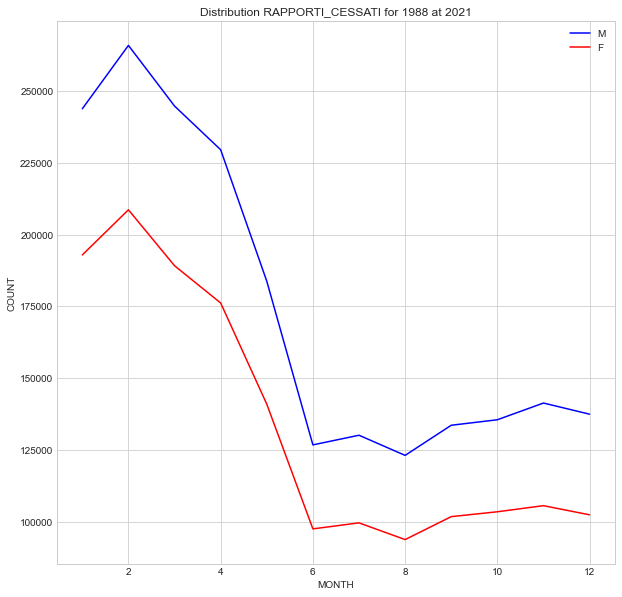

In [60]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_MC = global_Data_YEAR_MC.index
y_dataY_MC = global_Data_YEAR_MC.values

x_dataY_FC = global_Data_YEAR_FC.index
y_dataY_FC = global_Data_YEAR_FC.values


ax.plot(x_dataY_MC, y_dataY_MC, color='blue', label='M')
ax.plot(x_dataY_FC, y_dataY_FC, color='red', label='F')
plt.title('Distribution RAPPORTI_CESSATI for 1988 at 2021')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

2. __Data Analysis Before covid__

In [61]:
data_Before_CovidC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] == 2018) | 
                                         (Rapporti_Lavoro_Cessati_DF['YEAR'] == 2019)]

In [62]:
global_Data_YEAR_Before_CovidC = data_Before_CovidC.groupby(['YEAR']).MONTH.count()

In [63]:
global_Data_MONTH_Before_CovidC = data_Before_CovidC.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

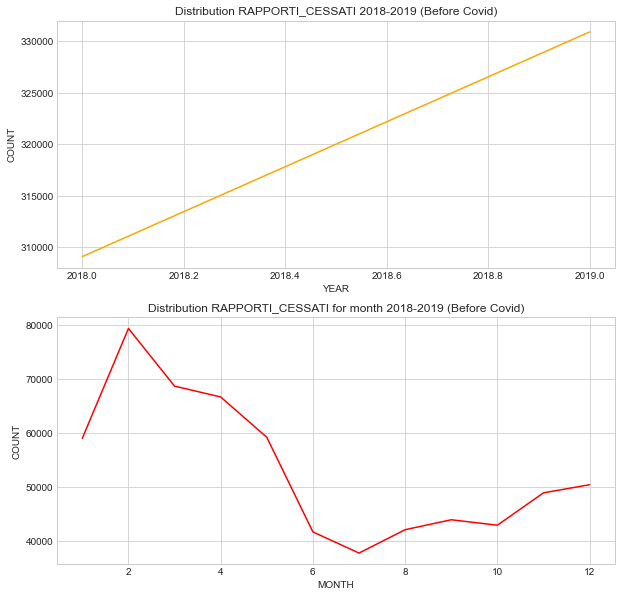

In [64]:
figure = plt.figure(figsize=(10, 10))

x_dataY_BCC = global_Data_YEAR_Before_CovidC.index
y_dataY_BCC = global_Data_YEAR_Before_CovidC.values

x_dataM_BCC = global_Data_MONTH_Before_CovidC.index
y_dataM_BCC = global_Data_MONTH_Before_CovidC.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_BCC, y_dataY_BCC, color='orange')
plt.title('Distribution RAPPORTI_CESSATI 2018-2019 (Before Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_BCC, y_dataM_BCC, color='red')
plt.title('Distribution RAPPORTI_CESSATI for month 2018-2019 (Before Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [65]:
data_Before_Covid_MC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] == 2018) | 
                                         (Rapporti_Lavoro_Cessati_DF['YEAR'] == 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'M')]

data_Before_Covid_FC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] == 2018) | 
                                         (Rapporti_Lavoro_Cessati_DF['YEAR'] == 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'F')]

In [66]:
global_Data_YEAR_before_Covid_MC = data_Before_Covid_MC.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_before_Covid_FC = data_Before_Covid_FC.groupby(['MONTH']).GENERE.count()

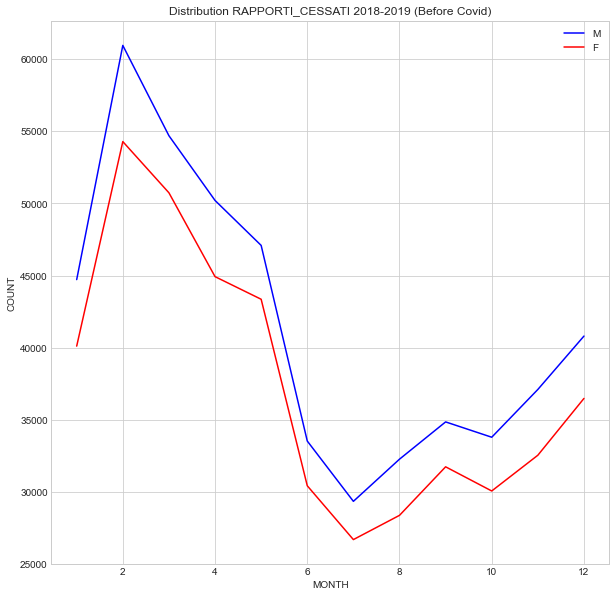

In [67]:
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_BC_MC = global_Data_YEAR_before_Covid_MC.index
y_dataY_BC_MC = global_Data_YEAR_before_Covid_MC.values

x_dataY_BC_FC = global_Data_YEAR_before_Covid_FC.index
y_dataY_BC_FC = global_Data_YEAR_before_Covid_FC.values


ax.plot(x_dataY_BC_MC, y_dataY_BC_MC, color='blue', label='M')
ax.plot(x_dataY_BC_FC, y_dataY_BC_FC, color='red', label='F')
plt.title('Distribution RAPPORTI_CESSATI 2018-2019 (Before Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

3. __Data Analysis During covid__ 

In [68]:
data_during_CovidC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] > 2019)]

In [69]:
global_Data_YEAR_during_CovidC = data_during_CovidC.groupby(['YEAR']).MONTH.count()

In [70]:
global_Data_MONTH_during_CovidC = data_during_CovidC.groupby(['MONTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

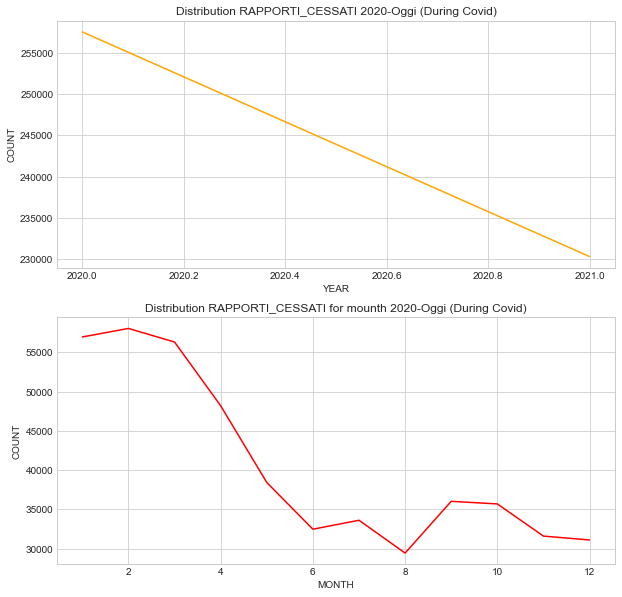

In [71]:
figure = plt.figure(figsize=(10, 10))

x_dataY_DCC = global_Data_YEAR_during_CovidC.index
y_dataY_DCC = global_Data_YEAR_during_CovidC.values

x_dataM_DCC = global_Data_MONTH_during_CovidC.index
y_dataM_DCC = global_Data_MONTH_during_CovidC.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_DCC, y_dataY_DCC, color='orange')
plt.title('Distribution RAPPORTI_CESSATI 2020-Oggi (During Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_DCC, y_dataM_DCC, color='red')
plt.title('Distribution RAPPORTI_CESSATI for mounth 2020-Oggi (During Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')

In [72]:
data_during_Covid_MC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] > 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'M')]
data_during_Covid_FC = Rapporti_Lavoro_Cessati_DF[(Rapporti_Lavoro_Cessati_DF['YEAR'] > 2019) & (Rapporti_Lavoro_Cessati_DF['GENERE'] == 'F')]

In [73]:
global_Data_YEAR_during_Covid_MC = data_during_Covid_MC.groupby(['MONTH']).GENERE.count()
global_Data_YEAR_during_Covid_FC = data_during_Covid_FC.groupby(['MONTH']).GENERE.count()

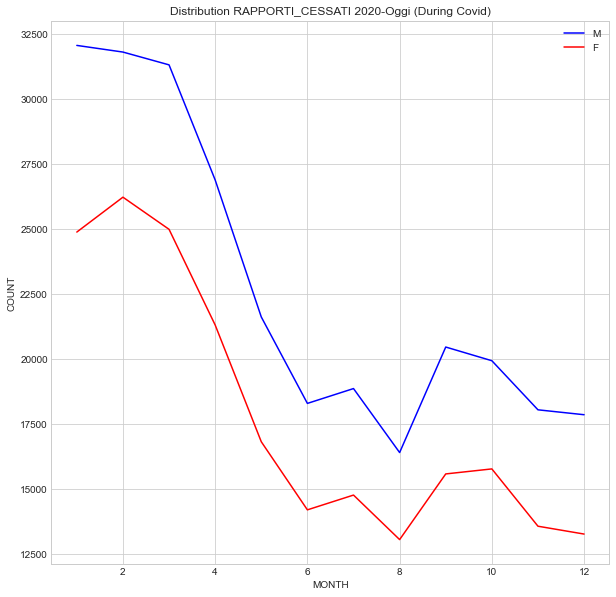

In [74]:
plt.style.use('seaborn-whitegrid')
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_DC_MC = global_Data_YEAR_during_Covid_MC.index
y_dataY_DC_MC = global_Data_YEAR_during_Covid_MC.values

x_dataY_DC_FC = global_Data_YEAR_during_Covid_FC.index
y_dataY_DC_FC = global_Data_YEAR_during_Covid_FC.values


ax.plot(x_dataY_DC_MC, y_dataY_DC_MC, color='blue', label='M')
ax.plot(x_dataY_DC_FC, y_dataY_DC_FC, color='red', label='F')
plt.title('Distribution RAPPORTI_CESSATI 2020-Oggi (During Covid)')
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.legend()

___

### __THIRD PART__

The last part of the analysis rappresents a comparison of the different results obtained from the previous data sets analysis. The comparision focus on:
1. __The global analysis__.
2. __The global analysis by gender (Male, Female).__
3. __The analysis before covid19 pandemic.__
4. __The analysis before covid19 pandemic by gender (Male, Female).__
5. __The analysis during covid19 pandemic.__
6. __The analysis during covid19 pandemic by gender (Male, Female).__

1. __The global analysis__

This first global analysis is focused on the distribution of active and inactive business contract:

- The top left graph rappresents the distribution of the active business contract by years, otherwise the bottom left graph rappresents the distribution of the active business contract by month.


- The top right graph rappresents the distribution of the inactive business contract by years, otherwise the bottom right graph rappresents the distribution of the inactive business contract by month.


<img src="Graph Analysis/Global dataAnalysis RapportiAttivati_cessati.png">

___

2. __The global analysis by gender (Male, Female).__

This comparison rappresents the distribution of active and inactive business conctract by gender:

- The left graph rappresents the active business contract by gender.

- The right graph rappresents the inactive business contract by gender

<img src="Graph Analysis/Global dataAnalysis  for gender Rapporti_Attivati_Cessati.png">

___

3. __The analysis before covid19 pandemic.__

This analysis is focused on the distribution of active and inactive business contract before covid19 pandemic:

- The top left graph rappresents the distribution of the active business contract by years, otherwise the bottom left graph rappresents the distribution of the active business contract by month.


- The top right graph rappresents the distribution of the inactive business contract by years, otherwise the bottom right graph rappresents the distribution of the inactive business contract by month.

<img src="Graph Analysis/Data Analysis before covid Rapporti_Attivati_Cessati.png">

___

4. __The analysis before covid19 pandemic by gender (Male, Female).__

This comparison rappresents the distribution of active and inactive business conctract by gender before covid19 pandemic:

- The left graph rappresents the active business contract by gender.

- The right graph rappresents the inactive business contract by gender


<img src="Graph Analysis/Data Analysis before covid for gender Rapporti_Attivati_Cessati.png">

___

5. __The analysis during covid19 pandemic.__

This analysis is focused on the distribution of active and inactive business contract during covid19 pandemic:

- The top left graph rappresents the distribution of the active business contract by years, otherwise the bottom left graph rappresents the distribution of the active business contract by month.

- The top right graph rappresents the distribution of the inactive business contract by years, otherwise the bottom right graph rappresents the distribution of the inactive business contract by month.



<img src="Graph Analysis/Data Analysis during covid Rapporti_Attivati_Cessati.png">

___

6. __The analysis during covid19 pandemic by gender (Male, Female)__

This comparison rappresents the distribution of active and inactive business conctract by gender during covid19 pandemic:

- The left graph rappresents the active business contract by gender.

- The right graph rappresents the inactive business contract by gender

<img src="Graph Analysis/Data Analysis during covid for gender Rapporti_Attivati_Cessati.png">